In [153]:
import pandas as pd
df = pd.read_csv('/Users/antoineguerrini/Downloads/titanic_data_ESCP.csv')

# 1. What is the total number of people on the titanic and how many of them survived and how many did not?

In [121]:
df.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

# 2. How many that survived were female and how many that died were female.

In [163]:
print('{} women survived and {} died'.format(len(df.query('Sex == "female" & Survived == 1')),len(df.query('Sex == "female" & Survived == 0')))) 

233 women survived and 81 died


# 3. How many children were on the titanic, NB: you are a child if age < 17.

In [149]:
print('{} children were on the titanic'.format(len(df.query('Age < 17'))))

134 children were on the titanic


# 4. How many children died that were on the ship.

In [148]:
print('{} children died'.format(len(df.query('Age < 17 & Survived == 0'))))

45 children died


# 5. How many people had families with them.

In [131]:
df['FamilySize'] = df['Siblings - Spouse'] + df['Parents - Children'] + 1

In [147]:
print('{} people were with family'.format(len(df.query('FamilySize != 1'))))

519 people were with family


# 6. What is the ratio of female to male.

In [145]:
print('The ratio men, women is {} %'.format(round(df.Sex.value_counts()[1]/(df.Sex.value_counts()[0]+df.Sex.value_counts()[1])*100,2)))

The ratio men, women is 35.6 %


# 7. What contributed to the survival of those who survived.

In [126]:
df.Sex = pd.get_dummies(df.Sex)

In [127]:
def get_title(name):
    import re
    title_search = re.search(' ([A-Za-z]+)\.', name) 
    if title_search:
        return title_search.group(1)
    return ""

In [128]:
df['Title'] = df['Name'].apply(get_title)

In [129]:
df['Name_length'] = df['Name'].apply(len)

In [130]:
df['Has_Cabin'] = df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [133]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Siblings - Spouse', 'Parents - Children']
df = df.drop(drop_elements, axis = 1)

In [134]:
df['Port of embarkation'] = pd.get_dummies(df['Port of embarkation'])

In [135]:
df.head()

,Survived,Sex,Age,Ticket class,Fare,Port of embarkation,Title,Name_length,Has_Cabin,FamilySize
0,0.0,0,22.0,3,7.2500,0,Mr,23,0,2
1,1.0,1,38.0,1,71.2833,1,Mrs,51,1,2
2,1.0,1,26.0,3,7.9250,0,Miss,22,0,1
3,1.0,1,35.0,1,53.1000,0,Mrs,44,1,2
4,0.0,0,35.0,3,8.0500,0,Mr,24,0,1


In [136]:
a = df.corr()

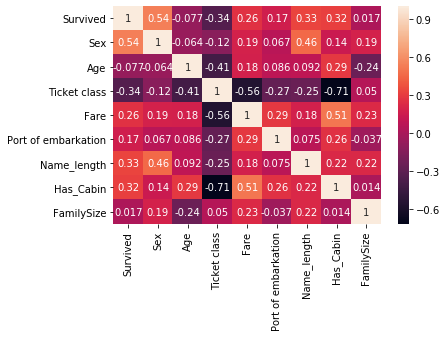

In [138]:
import seaborn as sns
sns.heatmap(a, annot= True)